In [1]:
!pip install --upgrade scikit-learn==1.2.0

# Importing Libraries

In [2]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
import numpy as np
import xgboost as xgb

# Loading Dataset

In [3]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/MLData.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df.head(5)

,Unnamed: 0,sale_id,pinx,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,...,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket
0,1,1999..144,..2734100475,1999-01-05,150000,1,,demo,1999,47.544359,...,0,0,0,0,0,0,0,0,0,E
1,2,1999..258,..1535200725,1999-01-05,235000,1,,demo,1999,47.421247,...,0,0,2,0,0,0,0,0,0,H
2,3,1999..331,..6028000255,1999-01-04,293000,1,,demo,1999,47.572103,...,0,0,0,0,0,0,0,0,0,R
3,4,1999..660,..6145600690,1999-01-08,164000,1,,demo,1999,47.703824,...,0,0,0,0,0,0,0,0,0,B
4,5,1999..775,..1939800005,1999-01-07,270000,1,,demo,1999,47.764482,...,0,0,0,0,0,0,0,0,0,Q


In [5]:
df.tail(5)

,Unnamed: 0,sale_id,pinx,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,...,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket
560214,560215,2022..35230,..1337800060,2022-12-17,1750000,3,,reno - before,2022,47.629275,...,0,0,0,0,0,0,0,0,0,D
560215,560216,2022..35574,..2856100991,2022-12-15,1250000,3,,reno - before,2022,47.676524,...,0,0,0,0,0,0,0,0,0,B
560216,560217,2022..35591,..4430100010,2022-12-16,1268900,1,,reno - before,2022,47.713828,...,0,0,0,0,0,0,0,0,0,B
560217,560218,2022..35644,..9253900030,2022-12-14,2300000,2,,reno - before,2022,47.601373,...,0,3,4,0,0,0,3,0,0,R
560218,560219,2022..35645,..9253900030,2022-12-16,2300000,3,,reno - before,2022,47.601373,...,0,3,4,0,0,0,3,0,0,R


# Data Understanding

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560219 entries, 0 to 560218
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        560219 non-null  int64  
 1   sale_id           560219 non-null  object 
 2   pinx              560219 non-null  object 
 3   sale_date         560219 non-null  object 
 4   sale_price        560219 non-null  int64  
 5   sale_nbr          560219 non-null  int64  
 6   sale_warning      560219 non-null  object 
 7   join_status       560219 non-null  object 
 8   join_year         560219 non-null  int64  
 9   latitude          560219 non-null  float64
 10  longitude         560219 non-null  float64
 11  area              560219 non-null  int64  
 12  city              560219 non-null  object 
 13  zoning            560219 non-null  object 
 14  subdivision       510572 non-null  object 
 15  present_use       560219 non-null  int64  
 16  land_val          56

In [7]:
df.shape

(560219, 49)

In [8]:
df.columns

Index(['Unnamed: 0', 'sale_id', 'pinx', 'sale_date', 'sale_price', 'sale_nbr',
       'sale_warning', 'join_status', 'join_year', 'latitude', 'longitude',
       'area', 'city', 'zoning', 'subdivision', 'present_use', 'land_val',
       'imp_val', 'year_built', 'year_reno', 'sqft_lot', 'sqft', 'sqft_1',
       'sqft_fbsmt', 'grade', 'fbsmt_grade', 'condition', 'stories', 'beds',
       'bath_full', 'bath_3qtr', 'bath_half', 'garb_sqft', 'gara_sqft', 'wfnt',
       'golf', 'greenbelt', 'noise_traffic', 'view_rainier', 'view_olympics',
       'view_cascades', 'view_territorial', 'view_skyline', 'view_sound',
       'view_lakewash', 'view_lakesamm', 'view_otherwater', 'view_other',
       'submarket'],
      dtype='object')

In [9]:
df.describe()

,Unnamed: 0,sale_price,sale_nbr,join_year,latitude,longitude,area,present_use,land_val,imp_val,...,view_rainier,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other
count,560219.000000,5.602190e+05,560219.000000,560219.000000,560219.000000,560219.000000,560219.000000,560219.000000,5.602190e+05,5.602190e+05,...,560219.000000,560219.000000,560219.000000,560219.000000,560219.000000,560219.000000,560219.000000,560219.000000,560219.000000,560219.000000
mean,280110.000000,5.768768e+05,1.886973,2020.671243,47.549997,-122.210445,48.284276,4.008152,4.406098e+05,5.555824e+05,...,0.018727,0.055734,0.059989,0.223195,0.019931,0.054788,0.057576,0.015074,0.021111,0.014177
std,161721.439565,5.059454e+05,1.071242,5.366178,0.142045,0.139747,26.587456,7.036914,4.149504e+05,4.135450e+05,...,0.225030,0.385251,0.386089,0.741098,0.233091,0.378206,0.388860,0.208961,0.250676,0.186365
min,1.000000,5.029300e+04,1.000000,1999.000000,47.155203,-122.527706,1.000000,2.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140055.500000,2.999500e+05,1.000000,2022.000000,47.448233,-122.323131,26.000000,2.000000,2.030000e+05,3.270000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,280110.000000,4.420000e+05,2.000000,2022.000000,47.563980,-122.222053,48.000000,2.000000,3.400000e+05,4.580000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,420164.500000,6.900000e+05,2.000000,2022.000000,47.673188,-122.122193,71.000000,2.000000,5.605000e+05,6.730000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,560219.000000,3.200000e+07,22.000000,2022.000000,47.777829,-121.156656,100.000000,29.000000,2.812800e+07,3.490100e+07,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [10]:
df.dtypes

,0
Unnamed: 0,int64
sale_id,object
pinx,object
sale_date,object
sale_price,int64
sale_nbr,int64
sale_warning,object
join_status,object
join_year,int64
latitude,float64


# Exploratory Data Analysis

To identify the outliers in sale_price

<Axes: xlabel='sale_price', ylabel='Count'>

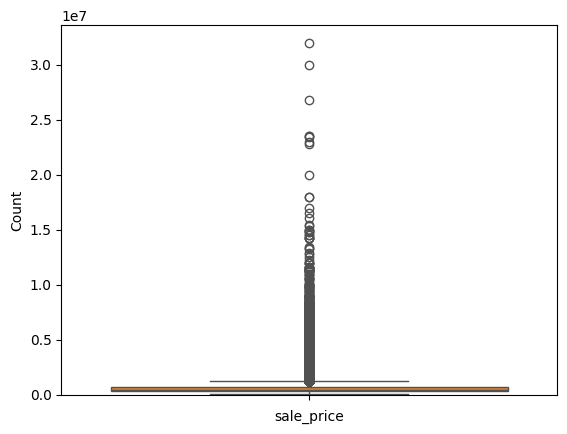

In [11]:
sns.histplot(df['sale_price'], kde=True, bins=30)
sns.boxplot(df['sale_price'])

 To identify which features are highly skewed and may require transformations


Skewness of Numerical Features:


<ipython-input-12-02192e5736be>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skewness.index, y=skewness.values, palette='viridis')


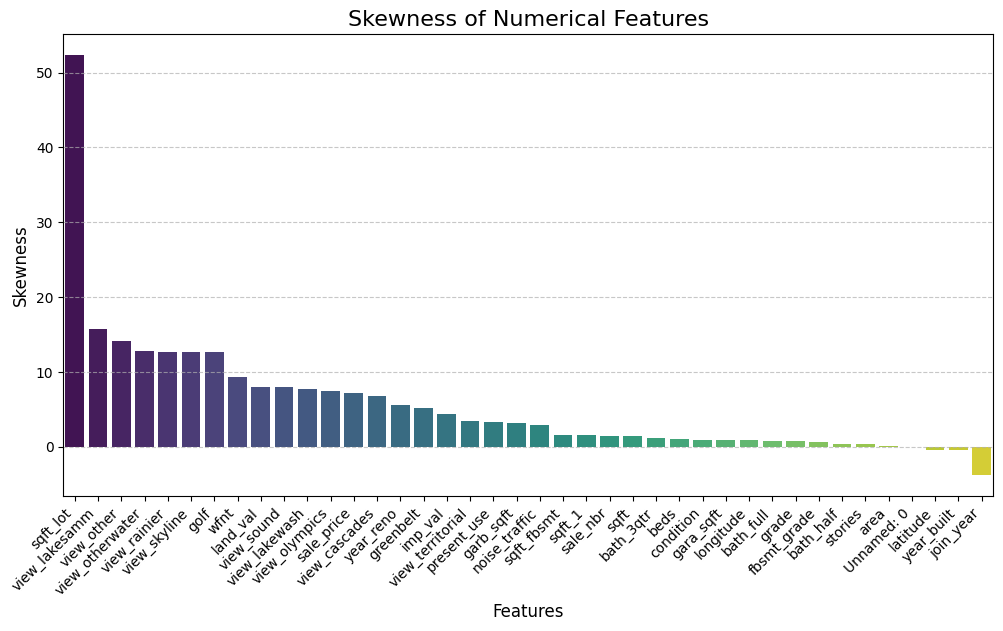

In [12]:
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nSkewness of Numerical Features:")
skewness = df[numerical_columns].skew().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=skewness.index, y=skewness.values, palette='viridis')
plt.title('Skewness of Numerical Features', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Skewness', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


To identify any trends, such as whether newer homes tend to have higher or lower sale prices.

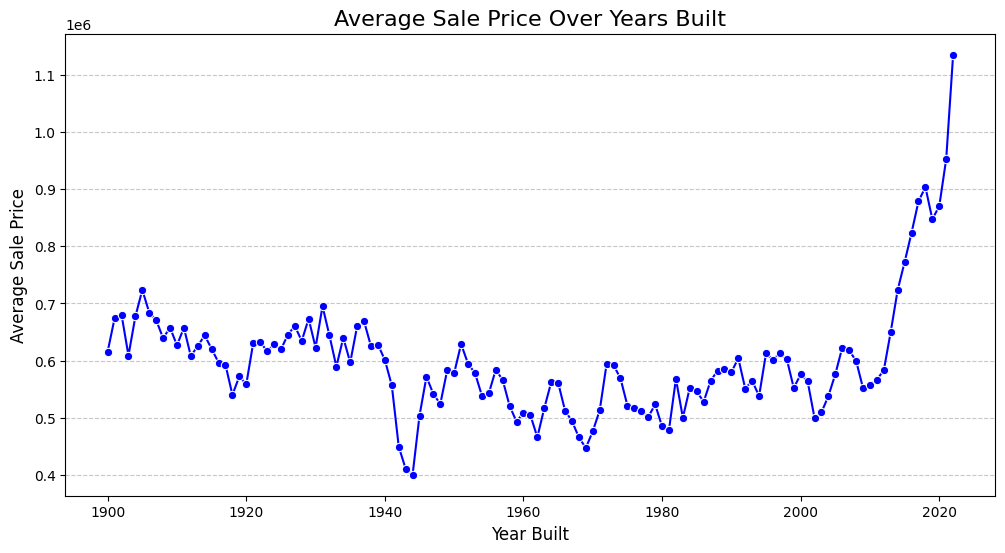

In [13]:
sale_price_col = 'sale_price'
built_year_col = 'year_built'

year_price_data = df.groupby(built_year_col)[sale_price_col].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=year_price_data[built_year_col], y=year_price_data[sale_price_col], marker='o', color='b')
plt.title('Average Sale Price Over Years Built', fontsize=16)
plt.xlabel('Year Built', fontsize=12)
plt.ylabel('Average Sale Price', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


To find out which cities have the highest or lowest average sale prices which can be useful for comparative analysis or identifying trends in different locations.

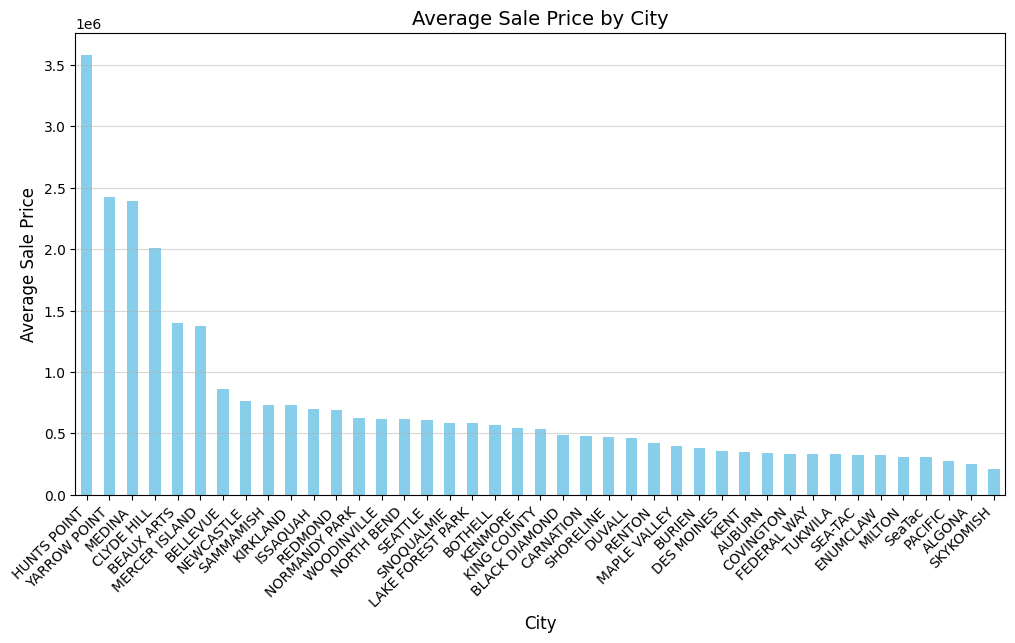

In [14]:
plt.figure(figsize=(12, 6))
df.groupby('city')['sale_price'].mean().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average Sale Price by City', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Sale Price', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.show()

To provide the insights into how sale prices differs geographically, this can be useful for real estate analysis.

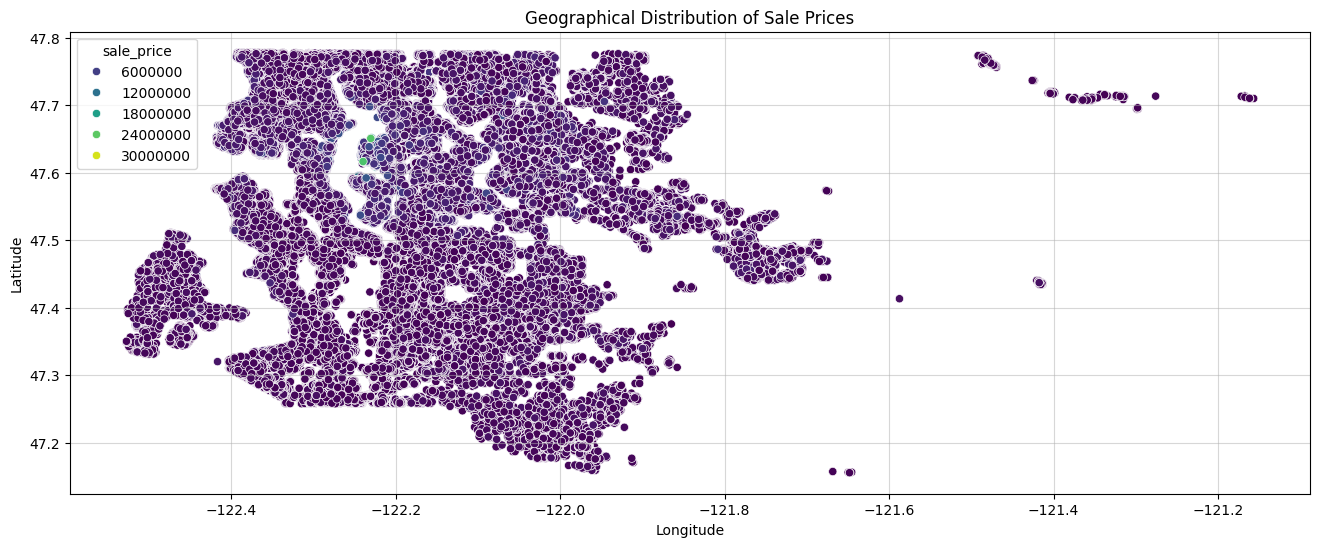

In [15]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x='longitude', y='latitude', hue='sale_price', data=df, palette='viridis')
plt.title('Geographical Distribution of Sale Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(alpha=0.5)
plt.show()

 To analyze how the area (square feet) relates to its price.

<Axes: xlabel='sqft', ylabel='sale_price'>

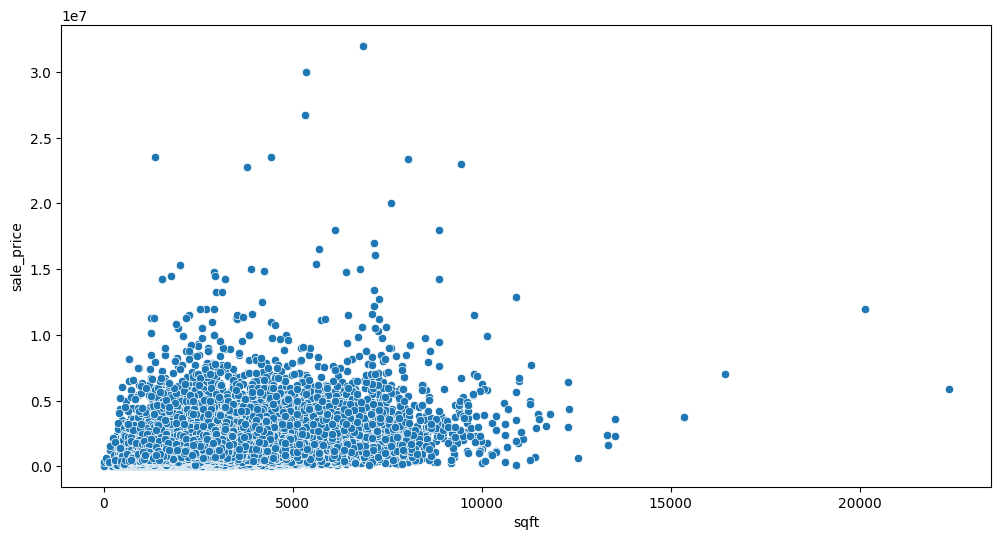

In [16]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='sqft', y='sale_price', data=df)

 To analyze how the noise traffic relates to its price.

<Axes: xlabel='noise_traffic', ylabel='sale_price'>

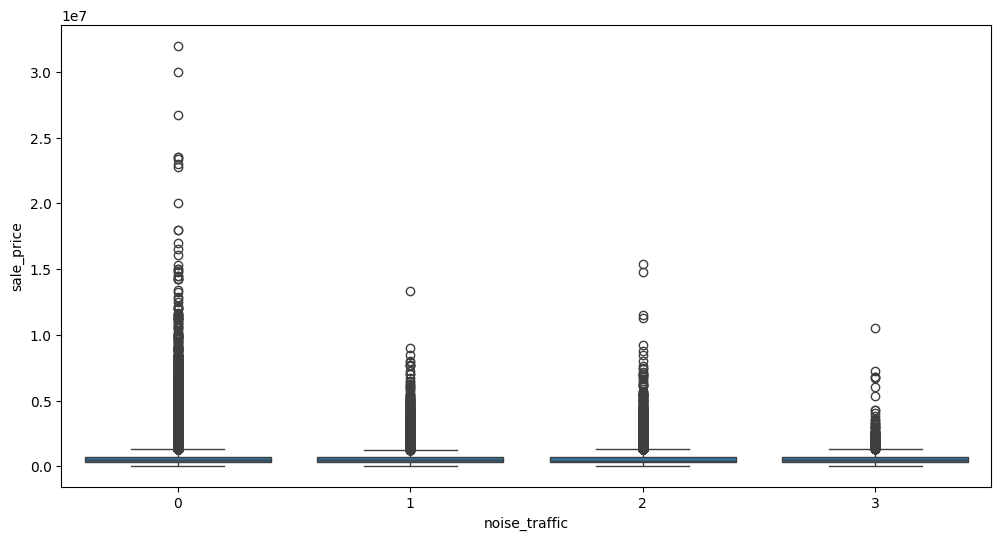

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(x='noise_traffic', y='sale_price', data=df)

 To analyze how number of stories relates to its price.

<Axes: xlabel='stories', ylabel='sale_price'>

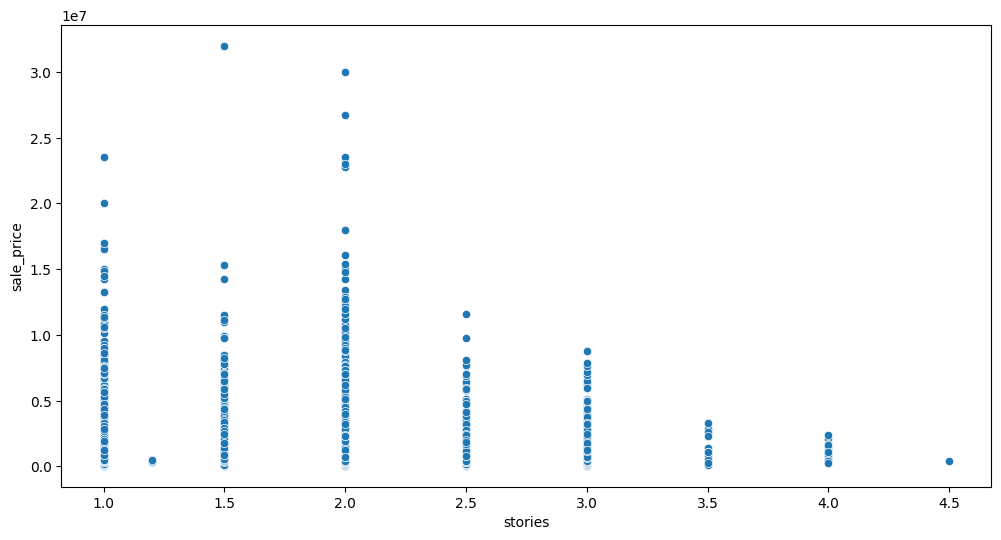

In [18]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='stories', y='sale_price', data=df)

To find out the correlation among the selected features and target

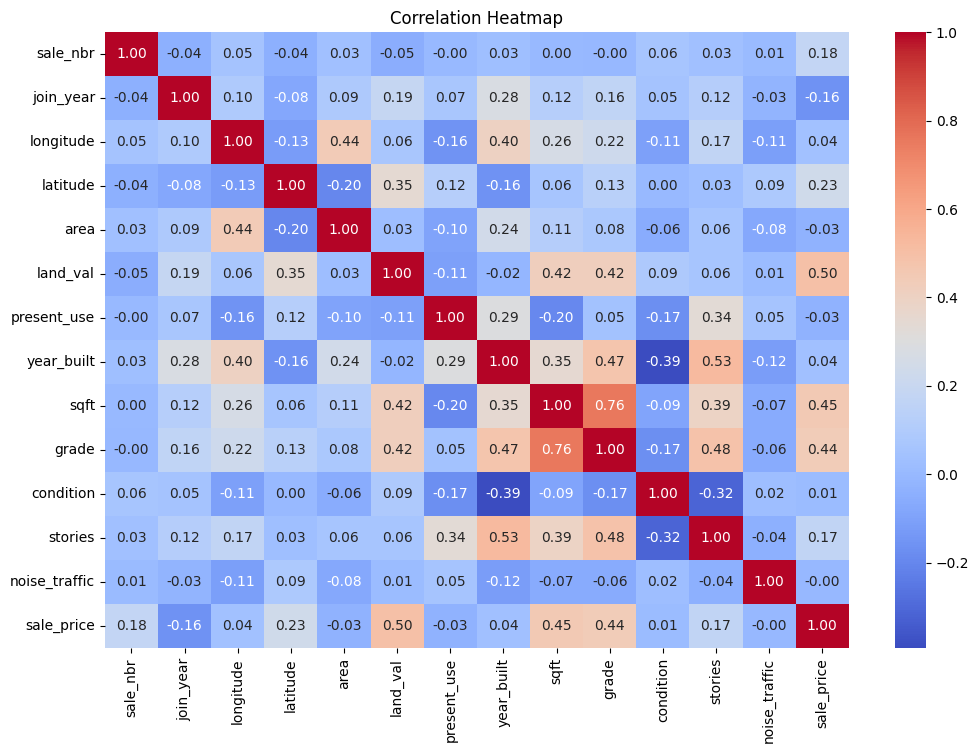

In [19]:
numerical_columns = ['sale_nbr','join_year','longitude','latitude','area','land_val','present_use','year_built',
                     'sqft','grade','condition','stories','noise_traffic','sale_price']
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Dropping the identifiers

In [20]:
df.drop(['Unnamed: 0', 'sale_id', 'pinx'],axis=1,inplace=True)

# Handling Missing Value

In [21]:
df.isnull().sum()

,0
sale_date,0
sale_price,0
sale_nbr,0
sale_warning,0
join_status,0
join_year,0
latitude,0
longitude,0
area,0
city,0


In [22]:
Subdivision_missing_percent=(df['subdivision'].isnull().sum()/len(df['subdivision']))*100
Subdivision_missing_percent

8.862070011906058

In [23]:
df.drop(['subdivision'],axis=1,inplace=True)

# Checking for Duplicates

In [24]:
df.duplicated().sum()

0

# Columns Inspection

In [25]:
columns=['longitude','latitude']
for column in columns:
  corr_longlat_price=df[column].corr(df['sale_price'])
  print(f'The correlation between {column} and price is {corr_longlat_price}')

The correlation between longitude and price is 0.03746819090509054
The correlation between latitude and price is 0.2335419550993837


In [26]:
corr_grade_fbmst_grade=df['grade'].corr(df['fbsmt_grade'])
print(f'The correlation between grade and fbsmt_grade is {corr_grade_fbmst_grade}')

The correlation between grade and fbsmt_grade is 0.1369292048402849


In [27]:
columns=['grade','fbsmt_grade']
for column in columns:
  corr_grade_price=df[column].corr(df['sale_price'])
  print(f'The correlation between {column} and price is {corr_grade_price}')

The correlation between grade and price is 0.43728882662509794
The correlation between fbsmt_grade and price is 0.15430351020186903


In [28]:
correlation_values=df['imp_val'].corr(df['land_val'])
print(f'The correlation between area and sqft is {correlation_values}')

The correlation between area and sqft is 0.47446346016724517


# Creating new columns

In [29]:
df['total_baths'] = df['bath_full'] + df['bath_3qtr'] + df['bath_half']

In [30]:
df.drop(['bath_full','bath_3qtr','bath_half'],axis=1,inplace=True)

In [31]:
view_columns=['view_rainier', 'view_olympics', 'view_cascades', 'view_territorial',
                        'view_skyline', 'view_sound', 'view_lakewash', 'view_lakesamm',
                        'view_otherwater', 'view_other']
df['total_views'] = df[view_columns].sum(axis=1)

In [32]:
df.drop(columns=view_columns,inplace=True)

# Dropping Irrelevant Columns

In [33]:
df.drop(columns=['longitude','latitude'],inplace=True)

In [34]:
df.drop(['fbsmt_grade'],axis=1,inplace=True)

In [35]:
df.drop(columns=['sqft_1','sqft_fbsmt','sqft_lot'],inplace=True)

In [36]:
df.drop(['imp_val'],axis=1,inplace=True)

# Data Inspection

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560219 entries, 0 to 560218
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_date      560219 non-null  object 
 1   sale_price     560219 non-null  int64  
 2   sale_nbr       560219 non-null  int64  
 3   sale_warning   560219 non-null  object 
 4   join_status    560219 non-null  object 
 5   join_year      560219 non-null  int64  
 6   area           560219 non-null  int64  
 7   city           560219 non-null  object 
 8   zoning         560219 non-null  object 
 9   present_use    560219 non-null  int64  
 10  land_val       560219 non-null  int64  
 11  year_built     560219 non-null  int64  
 12  year_reno      560219 non-null  int64  
 13  sqft           560219 non-null  int64  
 14  grade          560219 non-null  int64  
 15  condition      560219 non-null  int64  
 16  stories        560219 non-null  float64
 17  beds           560219 non-nul

In [38]:
df.shape

(560219, 27)

In [39]:
df.columns

Index(['sale_date', 'sale_price', 'sale_nbr', 'sale_warning', 'join_status',
       'join_year', 'area', 'city', 'zoning', 'present_use', 'land_val',
       'year_built', 'year_reno', 'sqft', 'grade', 'condition', 'stories',
       'beds', 'garb_sqft', 'gara_sqft', 'wfnt', 'golf', 'greenbelt',
       'noise_traffic', 'submarket', 'total_baths', 'total_views'],
      dtype='object')

In [40]:
df.describe()

,sale_price,sale_nbr,join_year,area,present_use,land_val,year_built,year_reno,sqft,grade,...,stories,beds,garb_sqft,gara_sqft,wfnt,golf,greenbelt,noise_traffic,total_baths,total_views
count,5.602190e+05,560219.000000,560219.000000,560219.000000,560219.000000,5.602190e+05,560219.000000,560219.000000,560219.000000,560219.000000,...,560219.000000,560219.000000,560219.000000,560219.000000,560219.000000,560219.000000,560219.000000,560219.000000,560219.000000,560219.000000
mean,5.768768e+05,1.886973,2020.671243,48.284276,4.008152,4.406098e+05,1973.832933,60.000587,2125.324428,7.676464,...,1.518671,3.416930,80.140297,275.674956,0.091014,0.006210,0.033182,0.195675,2.559676,0.540301
std,5.059454e+05,1.071242,5.366178,26.587456,7.036914,4.149504e+05,30.346169,340.756413,927.360778,1.172363,...,0.520974,0.905594,178.597313,290.524042,0.806469,0.078559,0.179111,0.544401,0.960547,1.839229
min,5.029300e+04,1.000000,1999.000000,1.000000,2.000000,0.000000e+00,1900.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.999500e+05,1.000000,2022.000000,26.000000,2.000000,2.030000e+05,1953.000000,0.000000,1460.000000,7.000000,...,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,4.420000e+05,2.000000,2022.000000,48.000000,2.000000,3.400000e+05,1978.000000,0.000000,1970.000000,7.000000,...,1.500000,3.000000,0.000000,240.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
75%,6.900000e+05,2.000000,2022.000000,71.000000,2.000000,5.605000e+05,2000.000000,0.000000,2610.000000,8.000000,...,2.000000,4.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
max,3.200000e+07,22.000000,2022.000000,100.000000,29.000000,2.812800e+07,2022.000000,2022.000000,22370.000000,20.000000,...,4.500000,54.000000,12740.000000,8605.000000,9.000000,1.000000,1.000000,3.000000,14.000000,24.000000


In [41]:
df.dtypes

,0
sale_date,object
sale_price,int64
sale_nbr,int64
sale_warning,object
join_status,object
join_year,int64
area,int64
city,object
zoning,object
present_use,int64


# Data type conversion

In [42]:
df['sale_warning'] = pd.to_numeric(df['sale_warning'], errors='coerce')

In [43]:
df['sale_warning'] = df['sale_warning'].fillna(0)

In [44]:
df['sale_date'] = pd.to_datetime(df['sale_date'])
df['year'] = df['sale_date'].dt.year
df.drop(['sale_date'], axis=1, inplace=True)

In [45]:
submarket_unique_values = sorted(df['submarket'].unique())
mapping = {value: i + 1 for i, value in enumerate(submarket_unique_values)}

df['submarket_encoded'] = df['submarket'].map(mapping)

print(df[['submarket', 'submarket_encoded']].head())

  submarket  submarket_encoded
0         E                  5
1         H                  8
2         R                 18
3         B                  2
4         Q                 17


In [46]:
df.drop(['submarket'],axis=1,inplace=True)

# Label Encoding

In [47]:
# object_columns = df.select_dtypes(include=['object']).columns
# label_encoder = LabelEncoder()
# for column in object_columns:
#     df[column] = label_encoder.fit_transform(df[column])

In [48]:
object_columns = df.select_dtypes(include=['object']).columns
target = 'sale_price'
for column in object_columns:
    means = df.groupby(column)[target].mean()

    df[column] = df[column].map(means)

    df[column].fillna(df[target].mean(), inplace=True)

<ipython-input-48-6c3caa286f73>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[target].mean(), inplace=True)
<ipython-input-48-6c3caa286f73>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

# <h4> Splitting Data into Train and Test

In [49]:
X= df.drop(['sale_price'],axis=1)
y=df['sale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [50]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [51]:
lr_y_pred=lr_model.predict(X_test)

In [52]:
lr_pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': lr_y_pred.tolist()}).head(25)
lr_pred.head(10)

,Actual,Predicted
0,688000,692961.290308
1,325000,537542.437857
2,204000,59706.187669
3,293900,514766.272992
4,749000,953799.835879
5,266000,243793.655583
6,428000,492549.152766
7,385000,449226.884965
8,207500,208010.949515
9,139000,-205717.610462


Text(0.5, 1.0, 'Linear Regression Prediction V/S Actual Graph')

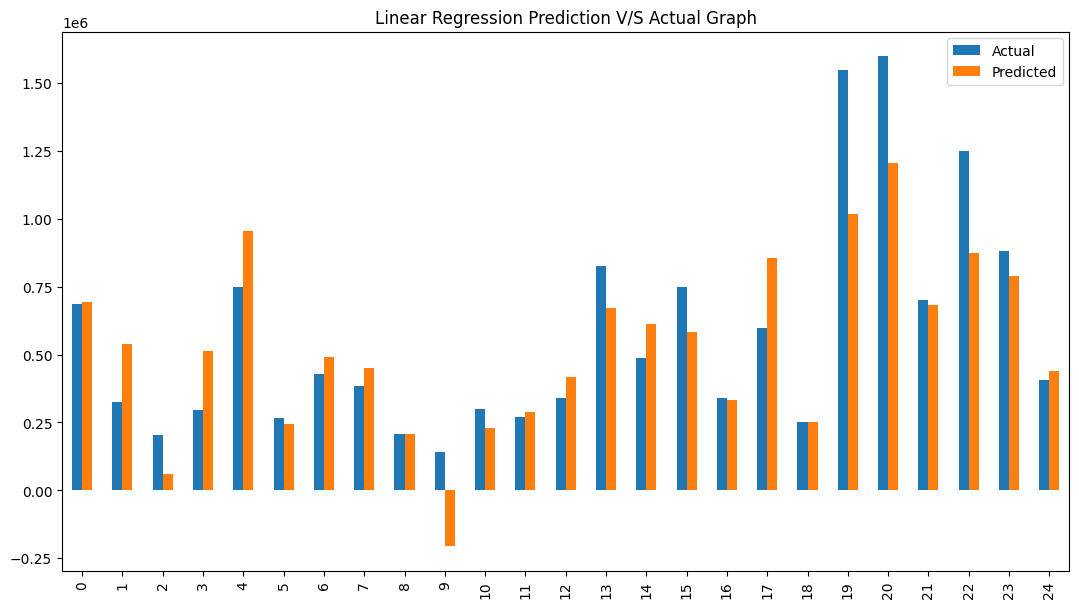

In [53]:
lr_pred.plot(kind='bar', figsize=(13, 7))
plt.title("Linear Regression Prediction V/S Actual Graph")

**Linear Regression Evaluation**

In [54]:
MSE = mean_squared_error(y_test, lr_y_pred)*100
R2 = r2_score(y_test, lr_y_pred)*100
MAE= mean_absolute_error(y_test, lr_y_pred)*100
RMSE = np.sqrt(mean_squared_error(y_test, lr_y_pred))*100

print(f'Mean Squared Error: {MSE}')
print(f'R-squared: {R2}')
print(f'Mean Absolute Error: {MAE}')
print(f'Root Mean Square Error: {RMSE}')

Mean Squared Error: 8380405483460.417
R-squared: 64.7990735599832
Mean Absolute Error: 16680928.3787418
Root Mean Square Error: 28948930.003474075


# Random Forest Regression

Without Hyperparamarter Tuning

In [55]:
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [56]:
rf_y_pred=rf_model.predict(X_test)

In [57]:
rf_pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': rf_y_pred.tolist()}).head(25)
rf_pred.head(10)

,Actual,Predicted
0,688000,808489.50
1,325000,368917.08
2,204000,223395.25
3,293900,266134.25
4,749000,1046635.40
5,266000,252128.50
6,428000,487109.87
7,385000,409124.00
8,207500,217408.74
9,139000,140534.20


Text(0.5, 1.0, 'Random Forest Regression Prediction V/S Actual Graph')

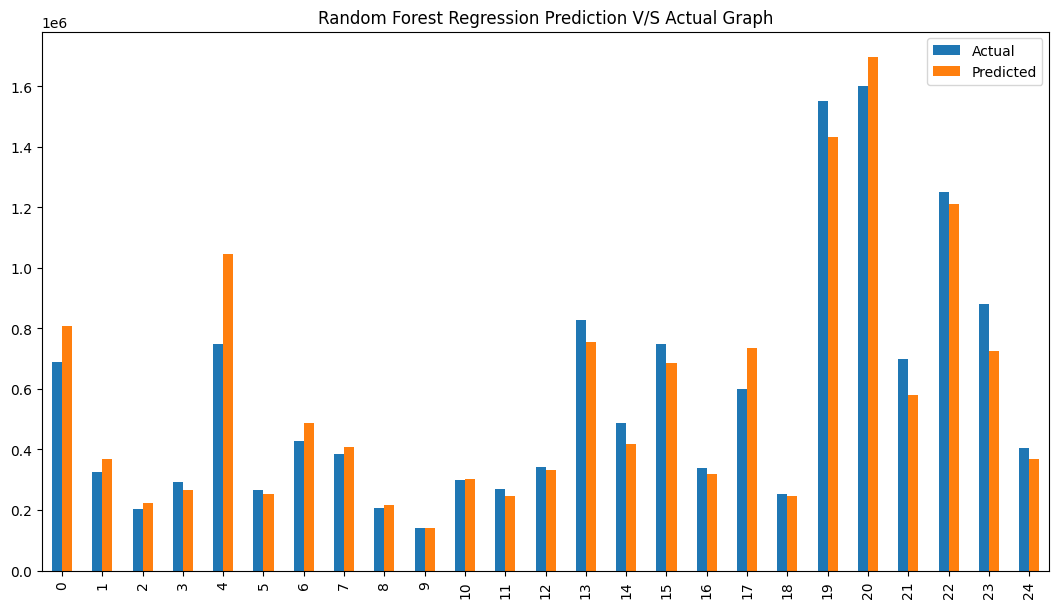

In [58]:
rf_pred.plot(kind='bar', figsize=(13, 7))
plt.title("Random Forest Regression Prediction V/S Actual Graph")

**Random Forest Regressor Evaluation**

In [59]:
MSE = mean_squared_error(y_test, rf_y_pred)
R2 = r2_score(y_test, rf_y_pred)*100
MAE= mean_absolute_error(y_test, rf_y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, lr_y_pred))

print(f'Mean Squared Error: {MSE}')
print(f'R-squared: {R2}')
print(f'Mean Absolute Error: {MAE}')
print(f'Root Mean Square Error: {RMSE}')

Mean Squared Error: 21640719874.138985
R-squared: 90.91006527187719
Mean Absolute Error: 66763.63226982641
Root Mean Square Error: 289489.30003474077


With hyperparameter Tuning

In [60]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
MSE = mean_squared_error(y_test, rf_y_pred)
R2 = r2_score(y_test, rf_y_pred) * 100
MAE = mean_absolute_error(y_test, rf_y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, rf_y_pred))

print(f'Mean Squared Error: {MSE}')
print(f'R-squared: {R2}')
print(f'Mean Absolute Error: {MAE}')
print(f'Root Mean Square Error: {RMSE}')

Mean Squared Error: 21356536859.526985
R-squared: 91.02943306872906
Mean Absolute Error: 66752.27535007124
Root Mean Square Error: 146138.75892290514


In [61]:
# n_estimators_range = [50, 100, 200]
# errors = []

# for n in n_estimators_range:
#     rf_model.set_params(n_estimators=n)
#     rf_model.fit(X_train, y_train)
#     y_pred = rf_model.predict(X_test)  # X_val for validation
#     mse = mean_squared_error(y_test, rf_y_pred)  # Assuming y_val is your validation target
#     errors.append(mse)

# optimal_n_estimators = n_estimators_range[np.argmin(errors)]
# print("Optimal number of estimators:", optimal_n_estimators)

In [62]:
# param_grid = {
#     'n_estimators': [50, 100],
#     'max_depth': [10, 20, None],
# }

# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)


# print("Best Parameters:", grid_search.best_params_)

# Gradient Boosting Machine

In [63]:
gb_model=GradientBoostingRegressor()
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [64]:
gb_y_pred=gb_model.predict(X_test)

In [65]:
gb_pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': gb_y_pred.tolist()}).head(25)
gb_pred.head(10)

,Actual,Predicted
0,688000,8.378184e+05
1,325000,3.946108e+05
2,204000,2.178827e+05
3,293900,2.899526e+05
4,749000,1.434762e+06
5,266000,2.673772e+05
6,428000,5.011781e+05
7,385000,4.147395e+05
8,207500,2.067419e+05
9,139000,1.025982e+05


Text(0.5, 1.0, 'Gradient Boosting Machine Prediction V/S Actual Graph')

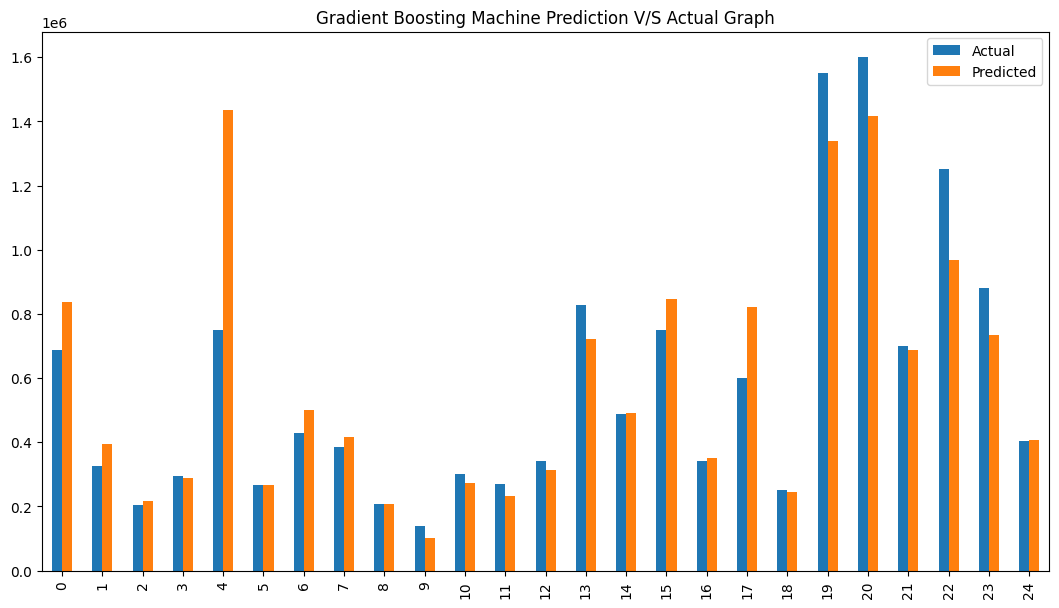

In [66]:
gb_pred.plot(kind='bar', figsize=(13, 7))
plt.title("Gradient Boosting Machine Prediction V/S Actual Graph")

**Gradient Boosting Machine Evaluation**

In [67]:
MSE = mean_squared_error(y_test, gb_y_pred)
R2 = r2_score(y_test, gb_y_pred)
MAE= mean_absolute_error(y_test, gb_y_pred)*100
RMSE = np.sqrt(mean_squared_error(y_test, lr_y_pred))

print(f'Mean Squared Error: {MSE}')
print(f'R-squared: {R2}')
print(f'Mean Absolute Error: {MAE}')
print(f'Root Mean Square Error: {RMSE}')

Mean Squared Error: 32193560483.534954
R-squared: 0.8647746631520734
Mean Absolute Error: 9321675.874882555
Root Mean Square Error: 289489.30003474077


With hyperparameter tuning: Gradient Boosting Machine

In [68]:
xgb_model = xgb.XGBRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.2],
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=2, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}


In [69]:
gb_model = GradientBoostingRegressor(learning_rate=0.2, max_depth=5, n_estimators=100)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
MSE = mean_squared_error(y_test, gb_y_pred)
R2 = r2_score(y_test, gb_y_pred) * 100
MAE = mean_absolute_error(y_test, gb_y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, gb_y_pred))

print(f'Mean Squared Error: {MSE}')
print(f'R-squared: {R2}')
print(f'Mean Absolute Error: {MAE}')
print(f'Root Mean Square Error: {RMSE}')

Mean Squared Error: 23069296002.650394
R-squared: 90.31000834965617
Mean Absolute Error: 74519.0493097153
Root Mean Square Error: 151885.7992132589
